In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score, roc_curve, RocCurveDisplay

In [2]:
income_data = pd.read_csv('adult.csv')
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
income_data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
income_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
income_data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [5]:
income_data['workclass'].replace('?', 'Self-emp-inc', inplace=True )

C:\Users\PC\AppData\Local\Temp\ipykernel_8980\2097762183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_data['workclass'].replace('?', 'Self-emp-inc', inplace=True )


In [6]:
income_data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [7]:
income_data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [8]:
replacements = {
    'Never-married': 'Unmarried',
    'Widowed': 'Unmarried',
    'Divorced': 'Unmarried',
    'Separated': 'Unmarried',
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married'
}
income_data['marital-status'].replace(replacements, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8980\3787027931.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_data['marital-status'].replace(replacements, inplace=True)


In [9]:
income_data['marital-status'].unique()

array(['Unmarried', 'Married'], dtype=object)

In [10]:
income_data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [11]:
income_data['occupation'].replace('?', income_data['occupation'].mode()[0], inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_8980\541376198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  income_data['occupation'].replace('?', income_data['occupation'].mode()[0], inplace=True)


In [12]:
label_encode_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

In [13]:
label_encoder = LabelEncoder()
for col in label_encode_features:
    income_data[col] = label_encoder.fit_transform(income_data[col])

In [14]:
income_data['capital-gain'].nunique()

123

In [15]:
income_data['capital-loss'].nunique()

99

In [16]:
numeric_features = ['fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [17]:
scaler = StandardScaler()
income_data[numeric_features] = scaler.fit_transform(income_data[numeric_features])

In [18]:
income_data.dtypes

age                  int64
workclass            int32
fnlwgt             float64
education            int32
educational-num      int64
marital-status       int32
occupation           int32
relationship         int32
race                 int32
gender               int32
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country       int32
income               int32
dtype: object

In [19]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,0.351675,1,7,1,6,3,2,1,-0.144804,-0.217127,-0.034087,39,0
1,38,3,-0.945524,11,9,0,4,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,28,1,1.394723,7,12,0,10,0,4,1,-0.144804,-0.217127,-0.034087,39,1
3,44,3,-0.277844,15,10,0,6,0,2,1,0.886874,-0.217127,-0.034087,39,1
4,18,4,-0.815954,15,10,1,9,3,4,0,-0.144804,-0.217127,-0.841104,39,0


In [20]:
X = income_data.drop('income', axis=1)
y = income_data['income']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Applying Cross-Validation to Random Forest Classifier

In [22]:
RFC_model = RandomForestClassifier()

In [23]:
cv_scores = cross_val_score(RFC_model, X, y, cv=5, scoring='accuracy')

In [24]:
print(f"Cross Validation scores for Random Forest Classifier: {cv_scores}")
print(f"Mean Cross Validation score for Random Forest Classifier: {cv_scores.mean()}")

Cross Validation scores for Random Forest Classifier: [0.85341386 0.85515406 0.85677723 0.85974611 0.86291974]
Mean Cross Validation score for Random Forest Classifier: 0.8576021996740597


# Evaluating Precision, Recall, and F1-Score for Random Forests

In [25]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = RFC_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")
print(f"Precision of the model: {precision}")
print(f"F1 score of the model: {f1}")
print(f"Recall of the model: {recall}")

Accuracy of the model: 0.8577083191155395
Precision of the model: 0.7498291182501708
F1 score of the model: 0.6778927854163448
Recall of the model: 0.6185508880744292


# Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [28]:
train_accuracy = {}
val_accuracy = {}
n_estimators = [50, 100, 150]
learning_rate = [0.1, 0.2, 0.3]

for rate in learning_rate:
    train_accuracy[rate] = []
    val_accuracy[rate] = []
    for estimators in n_estimators:
        GBM_classifier = GradientBoostingClassifier(n_estimators=estimators, learning_rate=rate)
        GBM_classifier.fit(X_train, y_train)
       
        train_accuracy[rate].append(accuracy_score(y_train, GBM_classifier.predict(X_train)))
        val_accuracy[rate].append(accuracy_score(y_test, GBM_classifier.predict(X_test)))




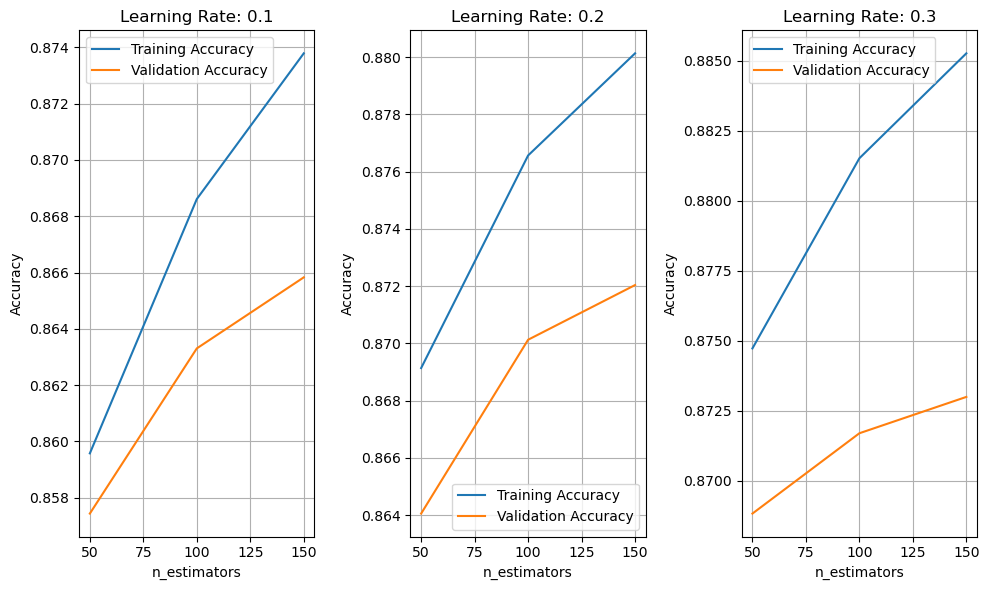

In [29]:

fig, axes = plt.subplots(1, len(learning_rate), figsize=(10, 6))

if len(learning_rate) == 1:
    axes = [axes]

for i, rate in enumerate(learning_rate):
    axes[i].plot(n_estimators, train_accuracy[rate], label=f'Training Accuracy')
    axes[i].plot(n_estimators, val_accuracy[rate], label=f'Validation Accuracy')
    axes[i].set_title(f'Learning Rate: {rate}')
    axes[i].set_xlabel('n_estimators')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# ROC Curve and AUC for Gradient Boosting Classifier

In [30]:
GBM_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2).fit(X_train, y_train)
y_prob = GBM_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

<Figure size 1000x600 with 0 Axes>

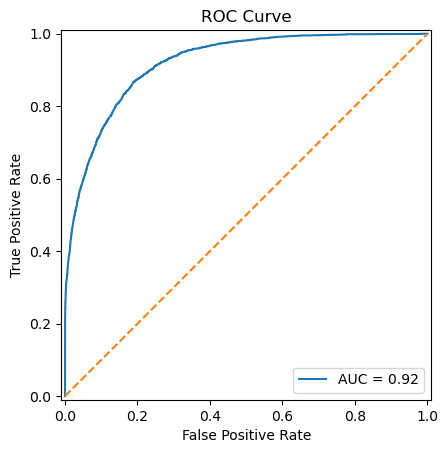

In [31]:
plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
svc = SVC(probability=True)

In [33]:
def evaluations(model, X, y):
    results = {}
    cv_acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_prec = cross_val_score(model, X, y, cv=5, scoring='precision')
    cv_f1 = cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_recall = cross_val_score(model, X, y, cv=5, scoring='recall')
    cv_roc_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    results[model] = [cv_acc, cv_prec, cv_f1, cv_recall, cv_roc_auc]
    return results

In [ ]:

results_svc = evaluations(svc, X, y)
results_rfc = evaluations(RFC_model, X, y)
results_gbc = evaluations(GBC_model, X, y)
updated = results_svc.update(results_rfc)
overall_results = updated.update(updated)
overall_results

In [ ]:
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'F1 Score', 'Recall'])
results_df